In [19]:
# Загрузка данных клиентов
data = {
	'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
	'Age': [32, 45, 29, 56, 38, 60, 50, 25, 30, 40, 55, 65, 20, 33, 39, 22, 28, 49, 41, 70],
	'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female'],
	'HasPartner': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
	'HasChild': ['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No','No', 'No', 'Yes', 'Yes', 'Yes'],
	'TotalSpend': [1000, 1500, 500, 2000, 800, 200, 1800, 1400, 600, 900, 350, 690, 500, 1200, 1300, 2500, 850, 150, 1900, 50],
	'Purchases': [5, 3, 7, 2, 4, 1, 8, 3, 6, 9, 6, 1, 4, 1, 5, 10, 5, 2, 7, 1],
	'Stay': [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]  # 0 - остается, 1 - ушел
}

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

#  Очистка данных: обработка пропущенных значений и дубликатов
print("Количество пропущенных значений:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)

# Преобразование данных: кодирование категориальных признаков
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['HasPartner'] = le.fit_transform(df['HasPartner'])
df['HasChild'] = le.fit_transform(df['HasChild'])

# Выведем окончательный результат
print("Первые 5 строк данных:")
print(df.head())

print("\nОсновные статистики о клиентах:")
print(df.describe())


Количество пропущенных значений:
CustomerID    0
Age           0
Gender        0
HasPartner    0
HasChild      0
TotalSpend    0
Purchases     0
Stay          0
dtype: int64
Первые 5 строк данных:
   CustomerID  Age  Gender  HasPartner  HasChild  TotalSpend  Purchases  Stay
0           1   32       1           1         0        1000          5     0
1           2   45       0           0         0        1500          3     0
2           3   29       0           1         1         500          7     1
3           4   56       1           0         1        2000          2     1
4           5   38       1           0         0         800          4     0

Основные статистики о клиентах:
       CustomerID        Age     Gender  HasPartner   HasChild   TotalSpend  \
count    20.00000  20.000000  20.000000   20.000000  20.000000    20.000000   
mean     10.50000  41.350000   0.550000    0.450000   0.500000  1009.500000   
std       5.91608  14.525024   0.510418    0.510418   0.512989   

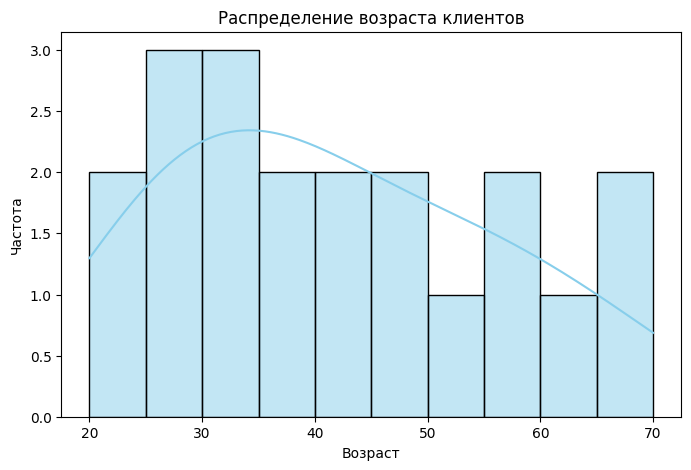

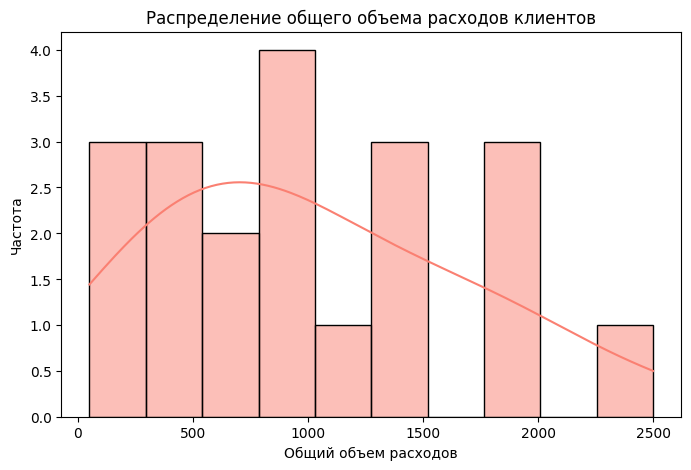

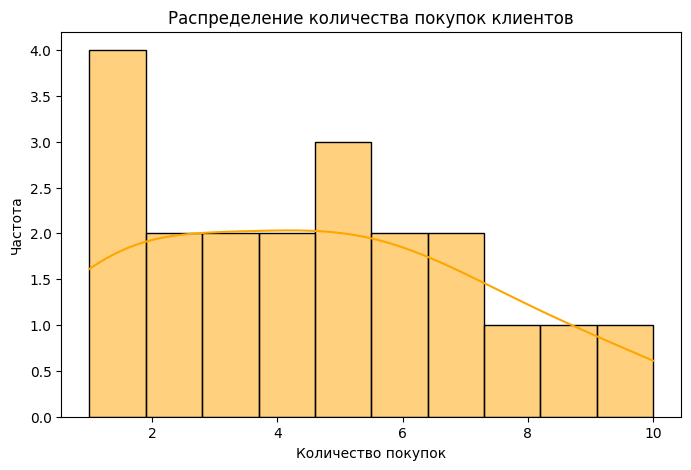

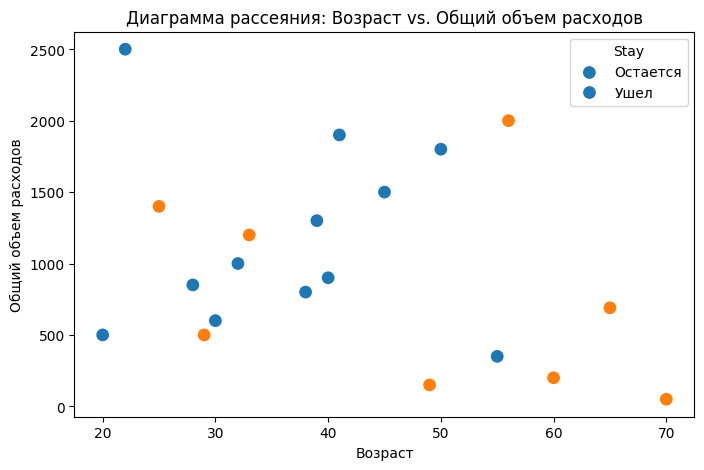

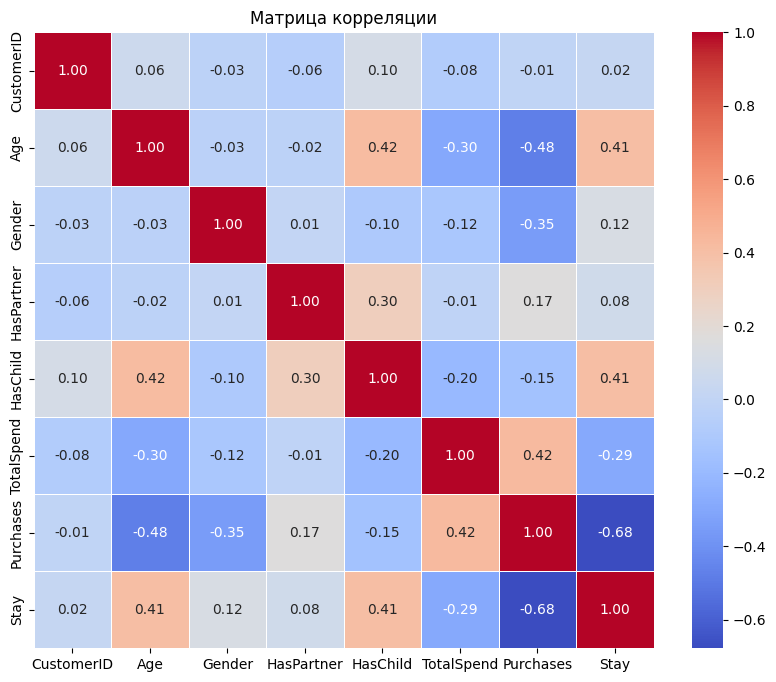

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построим гистограмму возраста клиентов
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста клиентов')
plt.show()

# Построим гистограмму общего объема расходов
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalSpend'], bins=10, kde=True, color='salmon')
plt.xlabel('Общий объем расходов')
plt.ylabel('Частота')
plt.title('Распределение общего объема расходов клиентов')
plt.show()

# Построим гистограмму количества покупок
plt.figure(figsize=(8, 5))
sns.histplot(df['Purchases'], bins=10, kde=True, color='orange')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
plt.title('Распределение количества покупок клиентов')
plt.show()

# Построим диаграмму рассеяния для визуализации связи между признаками Age и TotalSpend
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='TotalSpend', data=df, hue='Stay', s=100)
plt.xlabel('Возраст')
plt.ylabel('Общий объем расходов')
plt.title('Диаграмма рассеяния: Возраст vs. Общий объем расходов')
plt.legend(title='Stay', labels=['Остается', 'Ушел'])
plt.show()

# Построим матрицу корреляции между признаками
correlation_matrix = df.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

X = df[['Age', 'Gender', 'HasPartner', 'HasChild', 'TotalSpend', 'Purchases']]
y = df['Stay']

# Разделяем данные на обучающую (80%) и тестовую (20%) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Настройка конвейера
cls = SVC(C=10.0,
          kernel='rbf',
          gamma=0.1,
          decision_function_shape='ovr')

kernel_svm = Pipeline([('preprocessing', StandardScaler()),
                       ('classifier', cls)])

# Настройка сеточного поиска
param_grid = [{'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
              'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'classifier': [RandomForestClassifier(n_estimators=10)],
              'preprocessing': [None], 'classifier__max_features': [1, 2, 3]},
              {'classifier': [DecisionTreeClassifier(random_state=0)],
                'preprocessing': [None], 'classifier__max_depth': [1, 2, 3]},
              {'classifier': [GradientBoostingClassifier(random_state=0)],
                'preprocessing': [None], 'classifier__max_depth': [1, 2, 3]},
              {'classifier': [MLPClassifier(random_state=0)],
                'preprocessing': [StandardScaler(), None]}
              ]

gs = GridSearchCV(estimator=kernel_svm,
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1,
                  cv=5,
                  verbose=1,
                  refit=True,
                  pre_dispatch='2*n_jobs')

# Запуск
gs.fit(X_train, y_train)
print('Best GS Score %.2f' % gs.best_score_)
print('best GS Params %s' % gs.best_params_)
print('best score test %s' % gs.score(X_test,y_test))

# Предсказание на тренировочном наборе
y_pred = gs.predict(X_train)
train_acc = (y_train == y_pred).sum()/len(y_train)
print('\nTrain Accuracy: %.2f' % (train_acc))

# Оценка на тестовом наборе
y_pred = gs.predict(X_test)
test_acc = (y_test == y_pred).sum()/len(y_test)
print('\nTest Accuracy: %.2f' % (test_acc))

Fitting 5 folds for each of 83 candidates, totalling 415 fits
Best GS Score 0.87
best GS Params {'classifier': SVC(), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
best score test 1.0

Train Accuracy: 0.88

Test Accuracy: 1.00
